# Cálculo de pressão (P) para ponto de bolha e orvalho para mistura binária,
## dado composição global (z1,z2) e temperatura (T)

O objetivo deste material é mostrar uma estrutura de programação simples para:
* Cálculo de coeficientes de atividade usando modelo de Margules para mistura binária
* Método de cálculo (direto) de pressão de ponto de bolha
* Uso desse método para desenhar o diagrama de equlíbrio líqudo-vapor: P versus x1,y1,z1
* Método de cálculo iterativo de pressão de ponto de orvalho
* Uso desse outro método para desenhar o mesmo diagrama de equlíbrio líqudo-vapor: P versus x1,y1,z1

In [1]:
import numpy as np
#pacote para fazer vetores

from matplotlib import pyplot as plt
#pacote para desenhar graficos

%matplotlib inline
#configuração de desenho do gráfico no campo de resultado da célula no próprio arquivo ipynb

In [2]:
#constante dos modelos termodinâmicos em S.I.
R=8.314 #S.I.

# temperatura dada
T=298 #K

#pressao de saturação do componente 1 inventado em uma temperatura dada
Psat1=1e5 #Pa

#pressao de saturação do  componente 2 inventado na mesma temperatura dada
Psat2=20e5 #Pa

## As expressões de $\ln \left( \gamma_{i} \right)$ do modelo de Margules

$G^{\mathrm{E}}=A \; x_{1} \; x_{2}$

${R \; T} \; \ln \left( \gamma_{1} \right) = {A} \; {x_{1}}^{2} $
 
${R \; T} \; \ln \left( \gamma_{2} \right) = {A} \; {x_{2}}^{2} $



In [3]:
#definição da função que vai conseguir calcular lngammaA e lngammaB a partitr de x1 e x2
def func_gamma(x1,x2):
    #função que recebe um composição com x1 e x2 e retorna os gamma1 e gamma2
    
    #calculo do log de gamma de cada componente para a compoisção dada pelo modelo de margules de 1 parametro A
    lngamma1=(x2**2)*A/(R*T)
    lngamma2=(x1**2)*A/(R*T)
    
    gamma1= np.exp(lngamma1)
    gamma2= np.exp(lngamma2)
    
    return gamma1, gamma2

In [4]:
#definindo Parametro dado para o modelo
A=-3000.
#quando a função for cghamada ela vai usar esse valor definido aqui

In [5]:
#vamos fazer uns testes

#primeiro o caso do componente 2 puro
x1_test=0.
x2_test=1.
#chamar a função usando essa composição e salvar o resultado do teste na variável
gamma1_test, gamma2_test = func_gamma(x1=x1_test,x2=x2_test)
print(gamma1_test, gamma2_test)
print('fraçaõ molar do componente 2 tende a 1., gamma dele tende a 1.')

#agora para outro
x1_test=1.
x2_test=0.
#chamar a função usando essa composição e salvar o resultado do teste na variável
gamma1_test, gamma2_test = func_gamma(x1=x1_test,x2=x2_test)
print(gamma1_test, gamma2_test)
print('fraçaõ molar do componente 1 tende a 1., gamma dele tende a 1.')

#teste com uma composição arbitrária
x1_test=.2
x2_test=.8
#chamar a função usando essa composição e salvar o resultado do teste na variável
gamma1_test, gamma2_test = func_gamma(x1=x1_test,x2=x2_test)
print(gamma1_test, gamma2_test)
print('teste com uma composição arbitrária')

0.297940078014 1.0
fraçaõ molar do componente 2 tende a 1., gamma dele tende a 1.
1.0 0.297940078014
fraçaõ molar do componente 1 tende a 1., gamma dele tende a 1.
0.460725779374 0.952719725421
teste com uma composição arbitrária


In [6]:
#calculo de pressao de bolha (calculo explicito de P e y dado x=z)
def func_Pbolha(z1,z2):
    #entra compoisçao global
    x1=z1
    x2=z2
    
    #calcula os gamma com essa composição
    gamma1, gamma2 = func_gamma(x1=x1,x2=x2)

    #calculo da pressao com a equaão classica P=somatorio(xi gammi psati)
    P=x1*gamma1*Psat1+x2*gamma2*Psat2
    
    #calculo posterior das fracoes molares na fase gas
    y1=x1*gamma1*Psat1/P
    y2=x2*gamma2*Psat2/P
    
    #retornar pressao e composição do gas
    return P, y1,y2

In [7]:
#testes do metodo de pressao de ponto de bolha

x1_test=0.
x2_test=1.
resposta_pbolha_test = func_Pbolha(z1=x1_test,z2=x2_test)
print(resposta_pbolha_test)
print('fraçaõ molar do componente 2 tende a 1, a Pbolha é igual ao Psat do 2, o y é igual ao x igual a 1')

x1_test=1.
x2_test=0.
resposta_pbolha_test = func_Pbolha(z1=x1_test,z2=x2_test)
print(resposta_pbolha_test)
print('fraçaõ molar do componente 1 tende a 1, a Pbolha é igual ao Psat do 1, o y é igual ao x igual a 1')

x1_test=0.2
x2_test=0.8
resposta_pbolha_test = func_Pbolha(z1=x1_test,z2=x2_test)
print(resposta_pbolha_test)
print('teste com uma composição arbitrária, pressão intermediária se não houver azeotropo, ou maior ou menor se houver, y mais rico no leve (maior psat)')

(2000000.0, 0.0, 1.0)
fraçaõ molar do componente 2 tende a 1, a Pbolha é igual ao Psat do 2, o y é igual ao x igual a 1
(100000.0, 1.0, 0.0)
fraçaõ molar do componente 1 tende a 1, a Pbolha é igual ao Psat do 1, o y é igual ao x igual a 1
(1533566.0762615299, 0.00600855465579056, 0.99399144534420936)
teste com uma composição arbitrária, pressão intermediária se não houver azeotropo, ou maior ou menor se houver, y mais rico no leve (maior psat)


In [8]:
#fazer um gráfico
vetor_x1 = np.linspace(0,1,100) #vetor_fracoes_molares_de_A_em_fase_liquida
vetor_x2 = 1.-vetor_x1 #subtração termo-a-termo

vetor_y1 = np.zeros(100) #vetores de zeros para fazer o calculpo sequencial
vetor_y2 = np.zeros(100)
vetor_P = np.zeros(100)

#para i indo de 0 ate 99 (100 ptos)
for i in range(100):
    #--------------------------------------chma a função p bolha
    # usando como compoisção o iésimo x1 e x2 do nosso vetor para calculo sequencial
    #salvar a resposta de pressao e a resposta de y no iesimo elemtno dos vetor prealocados
    vetor_P[i],vetor_y1[i],vetor_y2[i] = func_Pbolha(z1=vetor_x1[i],z2=vetor_x2[i])

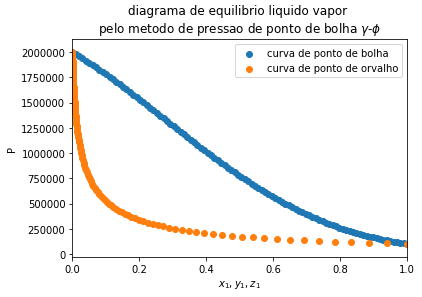

In [9]:
plt.title('diagrama de equilibrio liquido vapor \n'r'pelo metodo de pressao de ponto de bolha $\gamma$-$\phi$')
plt.scatter(vetor_x1,vetor_P,label='curva de ponto de bolha')
plt.scatter(vetor_y1,vetor_P,label='curva de ponto de orvalho')
plt.ylabel('P')
plt.xlabel(r'$x_1,y_1,z_1$')
plt.legend()
plt.xlim(0,1)
plt.show()

> Ao rodar o metodo de calculo de ponto de bolha para varios valores de composição da fase liquida obtemos a curva de ponto de orvalho inteira também

In [10]:
#calculo de pressao de orvalho
#(calculo implicito pois nao se sabe x como entrada e gamma depende de x - requer metodo iterativo)

def func_Porvalho(z1,z2):
    
    #PONTO DE ORVALHO, A COMPOSIÇÃO DO VAPOR É IGUAL A GLOBAL
    y1=z1
    y2=z2
    
    #DEFINIR ESTIMATIVA INICIAL BASEADA NO CASO DE MISTURA IDEAL
    gamma1=1.
    gamma2=1.
    
    #NUMERO MAXIMO DE ITERACOES
    imax=100
    #TOLERANCIA DE CONVERGENCIA
    tol=1e-9
    #DEFINIR VARIAVEL RESIDUO COM VALOR INICIAL MAIOR QUE A TOLERANCIA
    res=1.
    
    
    #INICIO DO METODO ITERATIVO
    while(res>tol and i<imax):
        
        #TODA ESSA PARTE COM IDENTAÇÃO ABAIXO DO BLOCK WHILE VAI SER EXECUTADA VÁRIAS VEZES
        #ATÉ QUE SE SATISFAÇA O CRITÉRIO DE CONVERGENCIA RESIDUO<TOLERANCIA
        #OU QUE ULTRAPASSE O LIMITE DE ITERAÇÕES I>IMAX
        
        # SALVAR A ESTIMATIVA INICIAL OU RESULTADO DA ITERAÇÃO ANTERIOR NAS VARIAVEIS _ANTIGO
        # PARA FAZER A ANALISE DO RESIDUO
        gamma1_antigo = gamma1
        gamma2_antigo = gamma2

        #EQUACAO classica DO PONTO DE ORVALHO PARA EQUILIBRIO BIFASICO DE SUBSTANCIAS MISCIVEIS
        #SUPOE O GAMMA CONHECIDO
        P = 1. / ( y1/(gamma1*Psat1) + y2/(gamma2*Psat2) )

        #CALCULO DA COMPOSICAO DA FASE LIQUIDA A PARTIR DESSA PRESSAO
        x1= y1*P/(gamma1*Psat1)
        x2= y2*P/(gamma2*Psat2)

        #CALCULO RIGOROSO DOS COEFICIENTES DE ATIVIDADE A PARTIR DO MODELO DE GIBBS DE EXCESSO
        gammaA,gammaB=func_gamma(x1=x1,x2=x2)

        #CALCULO DO RESIDUO DEFINIDO PELA VARIAÇAO NO VALOR DE GAMMA DE UMA ITERACAO PARA A OUTRA
        #ABS É A FUNÇÃO MÓDULO
        res= abs(gamma1_antigo - gamma1) + abs(gamma2_antigo - gamma2)
        
        #FIM DO BLOCO ITERATIVO, VOLTAR PARA A LINHA DO WHILE ATÉ CONVERGIR
        
    #ESSA PARTE ABAIXO, NÃO ESTANDO MAIS IDENTADA, NÃO FAZ PARTE DO MÉTODO ITERATIVO, ELA SÓ RODA APÓS A CONVERGÊNCIA
    #APÓS CONVERGIR, RETORNAR OS RESULTADOS    
    return P, x1, x2

In [11]:
y1_test=0.
y2_test=1.
resposta_porvalho_test = func_Porvalho(z1=y1_test,z2=y2_test)
print(resposta_porvalho_test)
print('fraçaõ molar do componente 2 tende a 1, a Porvalho é igual ao Psat do 2, o x é igual ao y = 1')

y1_test=1.
y2_test=0.
resposta_porvalho_test = func_Porvalho(z1=y1_test,z2=y2_test)
print(resposta_porvalho_test)
print('e vice versa')

y1_test=.2
y2_test=.8
resposta_porvalho_test = func_Porvalho(z1=y1_test,z2=y2_test)
print(resposta_porvalho_test)
print('teste composição arbitrária')

(2000000.0, 0.0, 1.0)
fraçaõ molar do componente 2 tende a 1, a Porvalho é igual ao Psat do 2, o x é igual ao y = 1
(99999.99999999999, 0.9999999999999999, 0.0)
e vice versa
(416666.6666666667, 0.8333333333333335, 0.16666666666666669)
teste composição arbitrária


In [12]:
#fazer um gráfico
vetor_y1 = np.linspace(0,1,100) #vetor_fracoes_molares_de_A_em_fase_liquida
vetor_y2 = 1.-vetor_y1

vetor_x1 = np.zeros(100)
vetor_x2 = np.zeros(100)
vetor_P = np.zeros(100)

for i in range(100):
    vetor_P[i],vetor_x1[i],vetor_x2[i] = func_Porvalho(z1=vetor_y1[i],z2=vetor_y2[i])

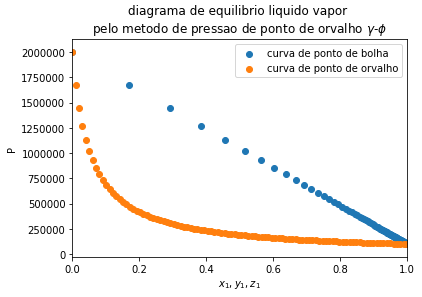

In [13]:
plt.title('diagrama de equilibrio liquido vapor \n'r'pelo metodo de pressao de ponto de orvalho $\gamma$-$\phi$')
plt.scatter(vetor_x1,vetor_P,label='curva de ponto de bolha')
plt.scatter(vetor_y1,vetor_P,label='curva de ponto de orvalho')
plt.ylabel('P')
plt.xlabel(r'$x_1,y_1,z_1$')
plt.legend()
plt.xlim(0,1)
plt.show()

> É possível obter o mesmo gráfico a partir do cálculo sequencial usando o método de pressao de ponto de orvalho ou de pressao de ponto de bolha